In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
import cufflinks as cf

In [2]:
diamonds_data_df = pd.read_csv('../data/raw/diamonds_train.csv')

In [3]:
diamonds_data_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.21,Premium,J,VS2,62.4,58.0,4268,6.83,6.79,4.25
1,0.32,Very Good,H,VS2,63.0,57.0,505,4.35,4.38,2.75
2,0.71,Fair,G,VS1,65.5,55.0,2686,5.62,5.53,3.65
3,0.41,Good,D,SI1,63.8,56.0,738,4.68,4.72,3.00
4,1.02,Ideal,G,SI1,60.5,59.0,4882,6.55,6.51,3.95


In [4]:
diamonds_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    40455 non-null  float64
 1   cut      40455 non-null  object 
 2   color    40455 non-null  object 
 3   clarity  40455 non-null  object 
 4   depth    40455 non-null  float64
 5   table    40455 non-null  float64
 6   price    40455 non-null  int64  
 7   x        40455 non-null  float64
 8   y        40455 non-null  float64
 9   z        40455 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.1+ MB


In [68]:
diamonds_data_df.shape

(40455, 10)

In [5]:
diamonds_data_df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [21]:
#Describing data
diamonds_data_df.describe()

,carat,depth,table,price,x,y,z
count,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000
mean,0.797706,61.752841,57.446133,3928.444469,5.729392,5.732819,3.537154
std,0.475544,1.431725,2.233535,3992.416147,1.124453,1.146650,0.697062
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,945.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2397.000000,5.690000,5.710000,3.520000
75%,1.040000,62.500000,59.000000,5331.000000,6.540000,6.540000,4.035000
max,4.500000,79.000000,95.000000,18823.000000,10.230000,58.900000,8.060000


In [63]:
#First and Last DataFrame Rows
first_rows = diamonds_data_df.head(5)
last_rows = diamonds_data_df.tail(5)

In [65]:
first_rows

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.21,Premium,J,VS2,62.4,58.0,4268,6.83,6.79,4.25
1,0.32,Very Good,H,VS2,63.0,57.0,505,4.35,4.38,2.75
2,0.71,Fair,G,VS1,65.5,55.0,2686,5.62,5.53,3.65
3,0.41,Good,D,SI1,63.8,56.0,738,4.68,4.72,3.00
4,1.02,Ideal,G,SI1,60.5,59.0,4882,6.55,6.51,3.95


In [66]:
last_rows

,carat,cut,color,clarity,depth,table,price,x,y,z
40450,1.34,Ideal,G,VS1,62.7,57.0,10070,7.10,7.04,4.43
40451,2.02,Good,F,SI2,57.1,60.0,12615,8.31,8.25,4.73
40452,1.01,Ideal,H,SI1,62.7,56.0,5457,6.37,6.42,4.01
40453,0.33,Ideal,J,VS1,61.9,54.3,456,4.45,4.47,2.76
40454,1.24,Ideal,I,SI1,62.0,58.0,6232,6.83,6.88,4.25


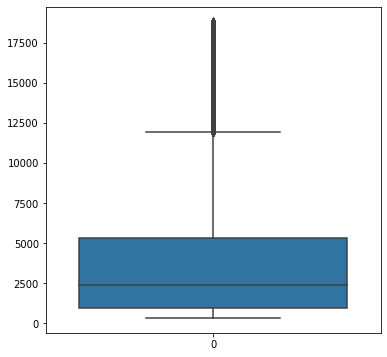

In [74]:
fig = plt.figure(figsize=(6, 6))
ax = sns.boxplot(data=diamonds_data_df['price']);

In [60]:
diamonds_data_df['price'].describe()

count    40455.000000
mean      3928.444469
std       3992.416147
min        326.000000
25%        945.000000
50%       2397.000000
75%       5331.000000
max      18823.000000
Name: price, dtype: float64

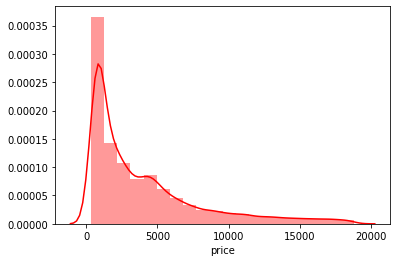

In [29]:
sns.distplot(diamonds_data_df['price'], color='r', bins=20);

In [32]:
df_num = diamonds_data_df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,carat,depth,table,price,x,y,z
0,1.21,62.4,58.0,4268,6.83,6.79,4.25
1,0.32,63.0,57.0,505,4.35,4.38,2.75
2,0.71,65.5,55.0,2686,5.62,5.53,3.65
3,0.41,63.8,56.0,738,4.68,4.72,3.00
4,1.02,60.5,59.0,4882,6.55,6.51,3.95


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd858a58090>,
      dtype=object)

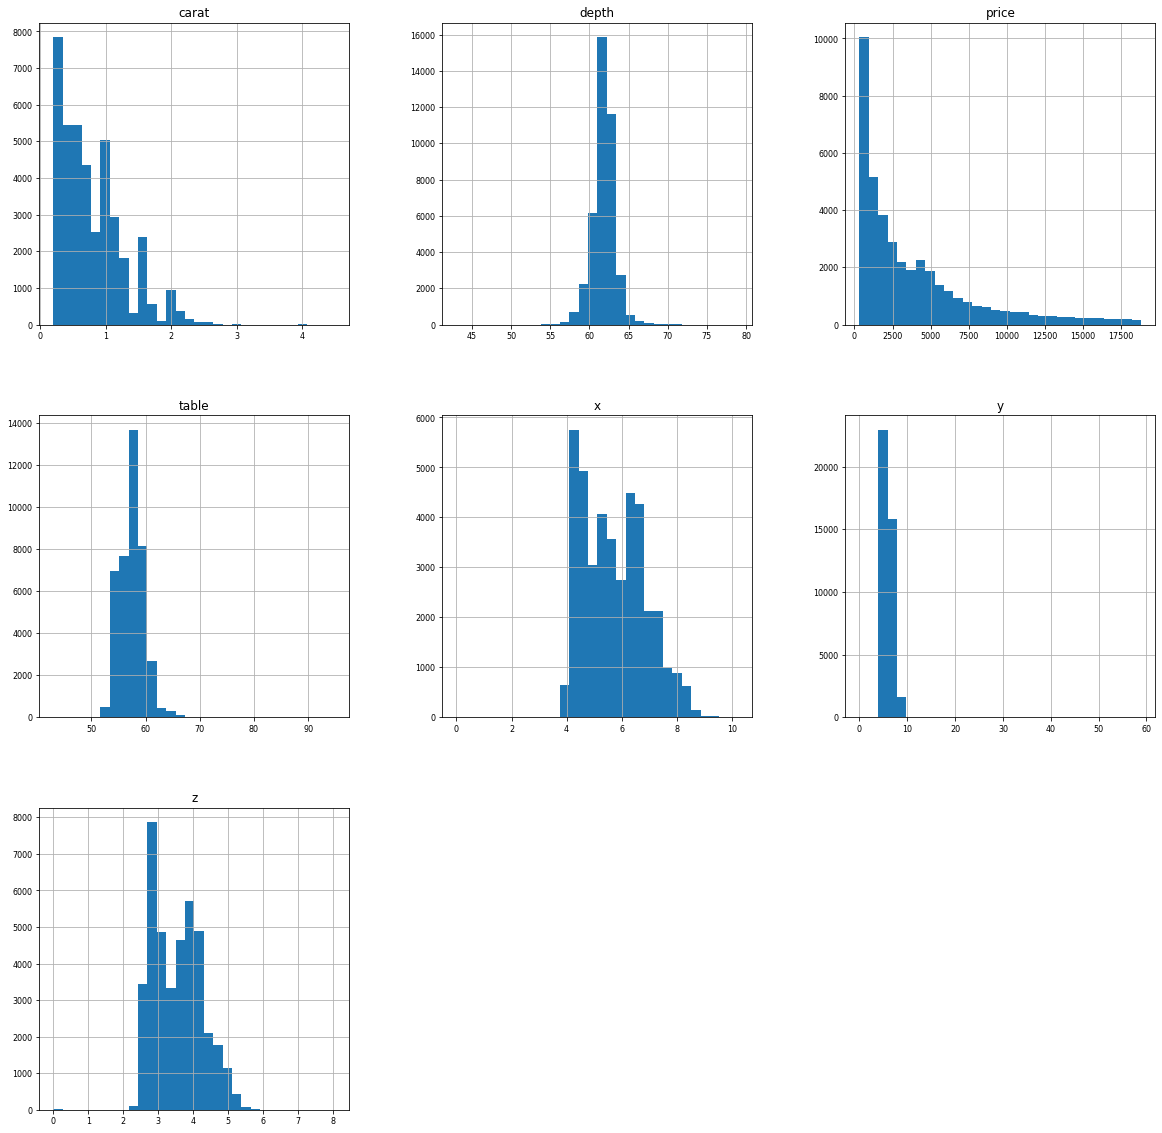

In [34]:
df_num.hist(figsize=(20, 20), bins=30, xlabelsize=8, ylabelsize=8)

In [41]:
diamonds_data_df_corr = diamonds_data_df.corr()
golden_features_list_sort = diamonds_data_df_corr[abs(diamonds_data_df_corr) > 0.5].sort_values(by='price', ascending=False)

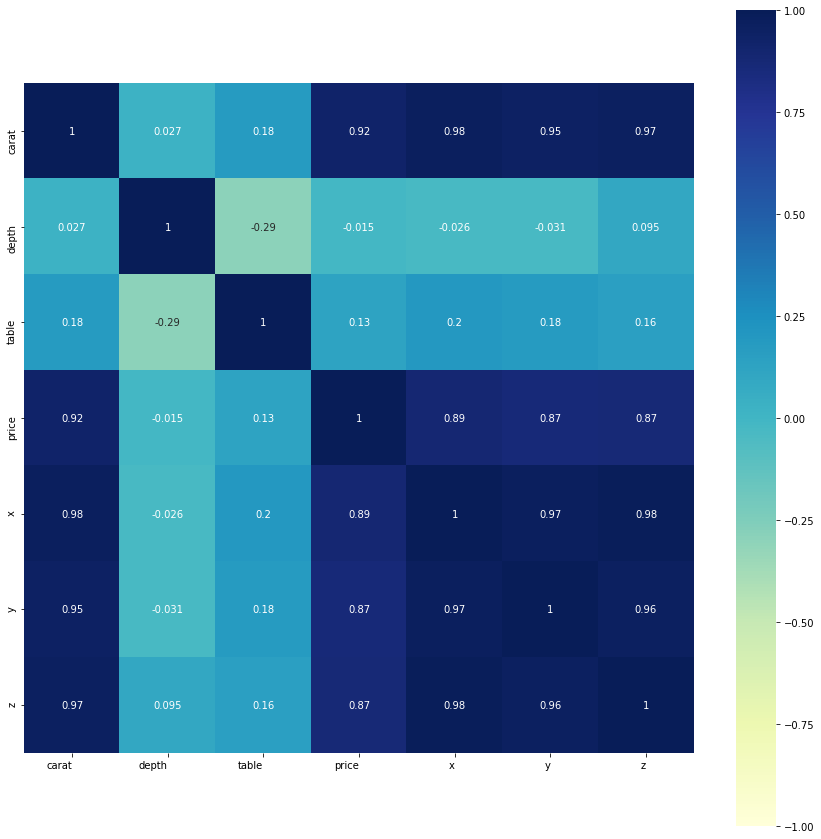

In [43]:
fig.ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(diamonds_data_df_corr, 
                 vmin=-1, vmax=1, center=0,
                 cmap='YlGnBu',
                 annot=True,
                 square=True)
ax.set_xticklabels(ax.get_xticklabels(),
                   rotation=360,
                   horizontalalignment='right');

In [ ]:
'1. el peso, la longitud y la anchura están muy relacionado con el precio del diamante y con los quilates.'

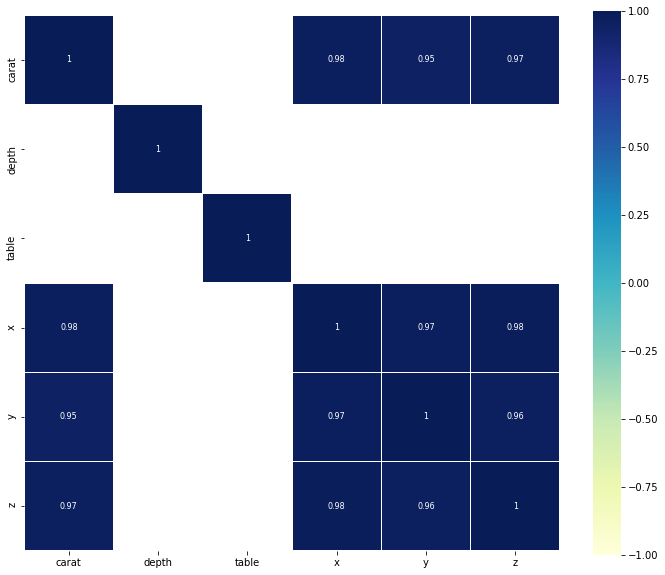

In [45]:
corr_price = diamonds_data_df.drop('price', axis=1).corr() # We already examined Price correlations
plt.figure(figsize=(12, 10))

sns.heatmap(corr_price[(corr_price >= 0.5) | (corr_price <= -0.4)], 
            cmap='YlGnBu', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

In [ ]:
'1. El precio se correlaciona directamente con los quitales, una correlación positiva.''
'2. x,y, z correlacionan positivamente con el precio'

In [46]:
cf.go_offline()

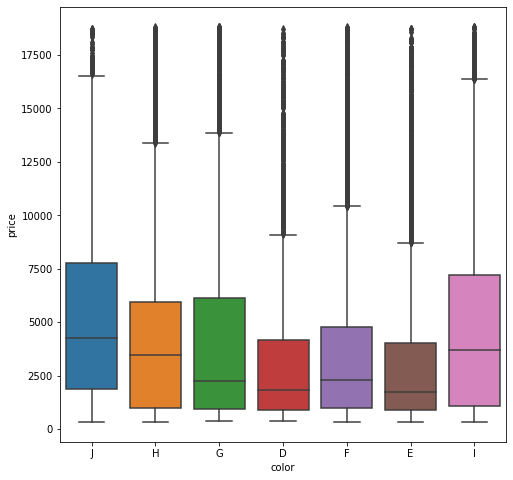

In [58]:
fig = plt.figure(figsize=(8, 8))
ax = sns.boxplot(x='color', y='price', data=diamonds_data_df);

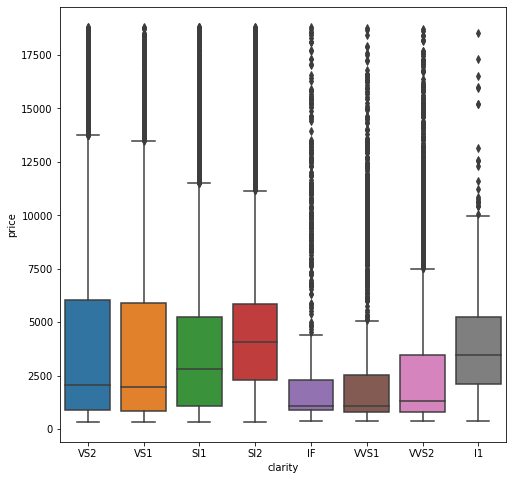

In [51]:
fig = plt.figure(figsize=(8, 8))
ax = sns.boxplot(x='clarity', y='price', data=diamonds_data_df);

In [52]:
price_diamonds_df = diamonds_data_df.groupby('clarity', as_index=False).agg({'price': 'sum'})

In [53]:
price_diamonds_df

,clarity,price
0,I1,2235789
1,IF,3712810
2,SI1,38994605
3,SI2,35345136
4,VS1,23031471
5,VS2,36192882
6,VVS1,7100049
7,VVS2,12312479


In [54]:
price_diamonds_df.iplot(kind='bar', x='clarity', y=['price'])

In [55]:
cut_diamonds_df = diamonds_data_df.groupby('cut', as_index=False).agg({'price': 'count'})

In [56]:
cut_diamonds_df

,cut,price
0,Fair,1217
1,Good,3663
2,Ideal,16220
3,Premium,10260
4,Very Good,9095


In [59]:
cut_diamonds_df.iplot(kind='bar', x='cut', y='price')